### Introduction 

‘online_shoppers_intention.csv’ on UCI Machine Learning Repository consists of 12,330
sessions with 84.5% negative class samples, i.e.; it was not ended with shopping. Only 15.5%
did shopping. 

Data set has 18 attributes.

Repository dataset as it is filtered to make sure each session would belong to a different user in a 1-year period to
avoid any tendency to a specific campaign, special day, user profile or period.

In [649]:
import pandas as pd
import numpy as np

import scipy 
from scipy.stats import norm
from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB



from sklearn.metrics import accuracy_score, roc_auc_score


import matplotlib.pyplot as plt

In [650]:
df = pd.read_csv('online_shoppers_intention.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes:

### Features

Data set consists of 10 numerical and 8 categorical attributes. 

In [651]:
df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month']].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month
0,0.0,0.0,0.0,0.0,1.0,0.20,0.20,0.0,0.0,Feb
1,0.0,0.0,0.0,0.0,2.0,0.00,0.10,0.0,0.0,Feb
2,0.0,-1.0,0.0,-1.0,1.0,0.20,0.20,0.0,0.0,Feb
3,0.0,0.0,0.0,0.0,2.0,0.05,0.14,0.0,0.0,Feb
4,0.0,0.0,0.0,0.0,10.0,0.02,0.05,0.0,0.0,Feb


In [652]:
df [ ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType','Weekend', 'Revenue'] ].head()

,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,1,1,1,Returning_Visitor,False,False
1,2,2,1,2,Returning_Visitor,False,False
2,4,1,9,3,Returning_Visitor,False,False
3,3,2,2,4,Returning_Visitor,False,False
4,3,3,1,4,Returning_Visitor,True,False


### DATA WRANGLING

In [653]:
df_w = df
for col in df_w.columns[0:6]:
    df_w = df_w[ df_w[col] != 0 ]

### Visualization

#### REVENUE 

In [654]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [655]:
df['Revenue'].value_counts()[0]/df['Revenue'].value_counts().sum(), df['Revenue'].value_counts()[1]/df['Revenue'].value_counts().sum()

(0.8452554744525548, 0.15474452554744525)

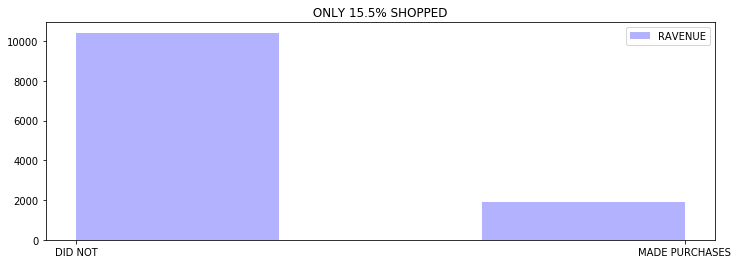

In [656]:
plt.figure(figsize=(12,4))
df['Revenue'].apply(lambda x: 1 if (x==True) else False ).hist(bins=3, alpha=0.3, color='blue', label='RAVENUE')
plt.grid()
plt.xticks([0,1],('DID NOT', 'MADE PURCHASES'))
plt.autoscale(enable=True)
plt.legend()
plt.title(' ONLY 15.5% SHOPPED ')
plt.show()

#### REVENUE VS MONTH:

In [657]:
df1 = df[ df['Revenue']==True ]
df2 = df[ df['Revenue']==False ]

In [658]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [659]:
month = df['Month'].value_counts().index 
rev = df['Month'].value_counts().values 

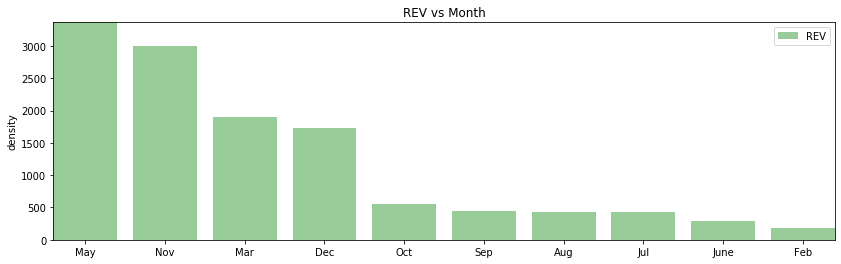

In [660]:
plt.figure(figsize=(14,4))
plt.bar(month, rev, alpha=0.4, color='green', label='REV' )
plt.legend()
plt.title('REV vs Month')
plt.ylabel('density')
plt.autoscale(tight=True, enable=True)
plt.show()

#### REVENUE VS Weekend 

In [661]:
df['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [662]:
df['Weekend'].value_counts()[0]/df['Weekend'].value_counts().sum(), df['Weekend'].value_counts()[1]/df['Weekend'].value_counts().sum()

(0.767396593673966, 0.23260340632603407)

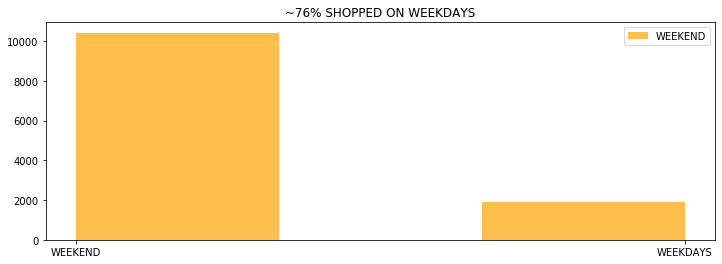

In [663]:
plt.figure(figsize=(12,4))
df['Revenue'].apply(lambda x: 1 if (x==True) else False ).hist(bins=3, alpha=0.7, color='orange', label='WEEKEND')
plt.grid()
plt.xticks([0,1],('WEEKEND', 'WEEKDAYS'))
plt.autoscale(enable=True)
plt.legend()
plt.title(' ~76% SHOPPED ON WEEKDAYS ')
plt.show()

#### PAGEVALUES

In [664]:
df_w.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [665]:
df_w1 = df_w[ df_w['Revenue']==1 ]

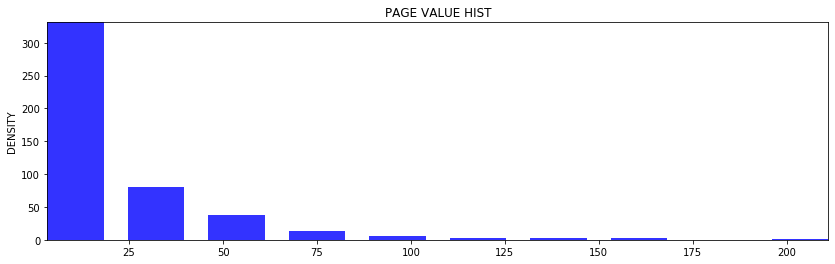

In [666]:
plt.figure(figsize=(14,4))
df_w1['PageValues'].hist(bins=10, alpha=0.8, color='blue', rwidth=0.7, label='PAGE VALUE')
plt.grid()
plt.autoscale(tight=True, enable=True)
plt.title('PAGE VALUE HIST')
plt.ylabel('DENSITY')
plt.show()

#### VISITOR TYPE

In [667]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [668]:
pie_val = [ df['VisitorType'].value_counts()[0]/df['VisitorType'].value_counts().sum(), df['VisitorType'].value_counts()[1]/df['VisitorType'].value_counts().sum(), df['VisitorType'].value_counts()[1]/df['VisitorType'].value_counts().sum() ]
pie_val

[0.8557177615571776, 0.13738848337388485, 0.13738848337388485]

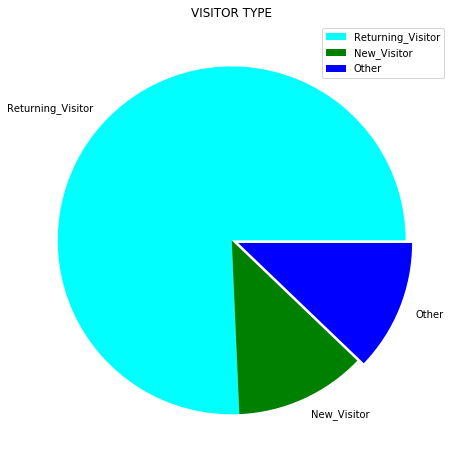

In [669]:
plt.figure(figsize=(8,8))
plt.pie(pie_val, colors = ['cyan', 'green', 'blue'], explode=[0, 0, 0.04], labels = ['Returning_Visitor', 'New_Visitor', 'Other']  )
plt.legend()
plt.title('VISITOR TYPE')
plt.show()

#### OPERATING SYSTEMS

In [670]:
df['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [671]:
opsys = []
for val in df['OperatingSystems'].value_counts():
    opsys.append(val)
 

opsys

[6601, 2585, 2555, 478, 79, 19, 7, 6]

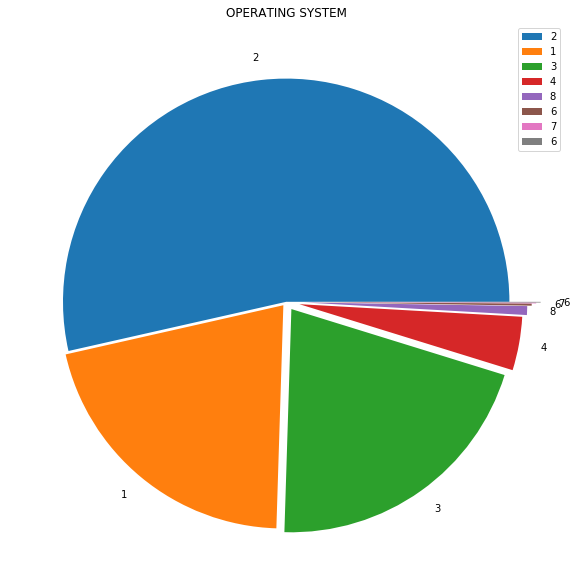

In [672]:
plt.figure(figsize=(10,12))
lab_list = ['2', '1', '3', '4', '8', '6', '7', '6'] 
exp_list = [0, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14]
plt.pie(opsys, labels = lab_list, explode = exp_list )
plt.legend()
plt.title('OPERATING SYSTEM')
plt.show()

#### SPECIAL DAY

In [673]:
df['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

In [674]:
SP_DAY = []
category = []
idx = 0
norm = df['SpecialDay'].value_counts().sum()
for val in df['SpecialDay'].value_counts():
    SP_DAY.append(val/norm)
    category.append(df['SpecialDay'].value_counts().index[idx])
    idx += 1 
    
SP_DAY, category

([0.8985401459854014,
  0.02846715328467153,
  0.026358475263584754,
  0.01970802919708029,
  0.014436334144363341,
  0.012489862124898622],
 [0.0, 0.6, 0.8, 0.4, 0.2, 1.0])

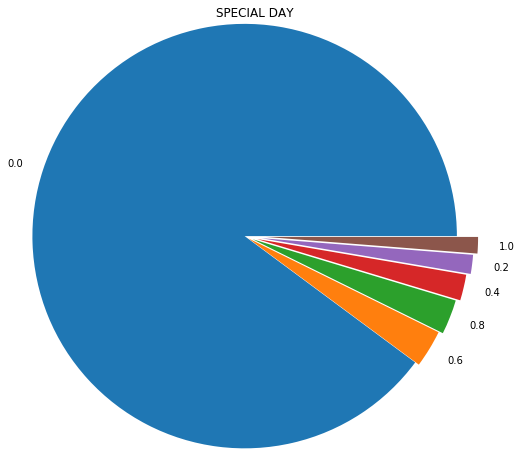

In [675]:
plt.figure(figsize=(8,10))
plt.pie(SP_DAY, labels=category, explode=[0, 0.02, 0.04, 0.06, 0.08, 0.10] )
plt.autoscale(enable=True, tight=True)
plt.title('SPECIAL DAY')
plt.grid()
plt.show()

In [676]:
df['Region'].value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

In [677]:
re_gion = []
categoryr = []
idx = 0
norm = df['SpecialDay'].value_counts().sum()
for val in df['SpecialDay'].value_counts():
    re_gion.append(val/norm)
    categoryr.append(df['SpecialDay'].value_counts().index[idx])
    idx += 1 
    
re_gion, categoryr

([0.8985401459854014,
  0.02846715328467153,
  0.026358475263584754,
  0.01970802919708029,
  0.014436334144363341,
  0.012489862124898622],
 [0.0, 0.6, 0.8, 0.4, 0.2, 1.0])

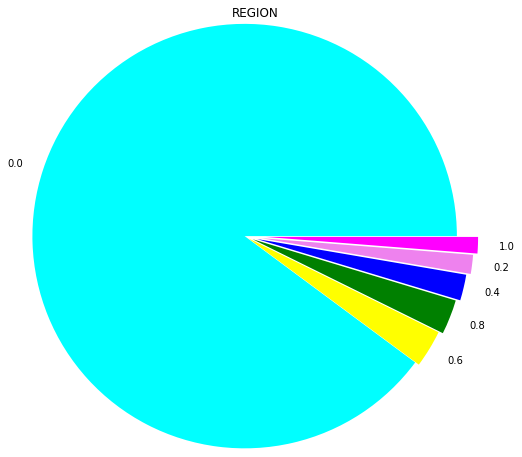

In [678]:
plt.figure(figsize=(8,10))
plt.pie(re_gion, labels=categoryr, explode=[0, 0.02, 0.04, 0.06, 0.08, 0.10], colors=['cyan','yellow','green','blue','violet','magenta'] )
plt.autoscale(enable=True, tight=True)
plt.title('REGION')
plt.grid()
plt.show()

## STATISTICS

In [679]:
len(df.columns), df.columns[0:6], df.columns[8], df.columns[17],

(18, Index(['Administrative', 'Administrative_Duration', 'Informational',
        'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration'],
       dtype='object'), 'PageValues', 'Revenue')

In [680]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [681]:
cols = [ 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration'] 

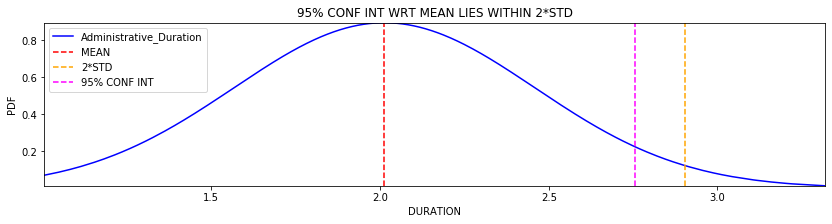

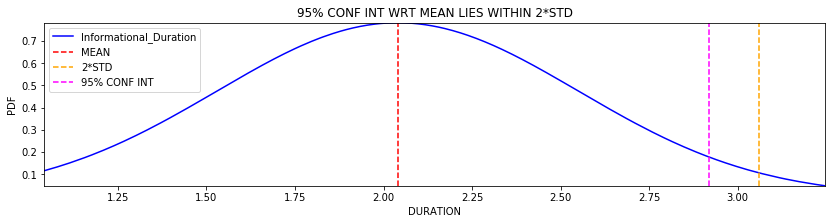

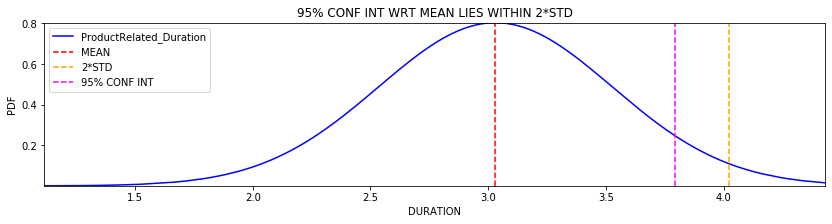

In [682]:
for col in cols:
    plt.figure(figsize=(14,3))
    df1_1 = df1[ df1[col]>10 ]
    data = np.sort(df1_1[col].apply(np.log10))
    data_pdf = scipy.stats.norm.pdf(data, loc=np.mean(data), scale=np.std(data) )
    data_cdf = scipy.stats.norm.cdf(data, loc=np.mean(data), scale=np.std(data) )
    plt.plot(data, data_pdf, label=col, color='blue')
    plt.axvline(np.mean(data), linestyle='--', label='MEAN', color='red')
    plt.axvline(np.mean(data)+2*np.std(data), linestyle='--', label='2*STD', color='orange')
    plt.axvline(np.percentile(data, [95]), linestyle='--', color='magenta', label='95% CONF INT')
    plt.legend()
    plt.autoscale(tight=True, enable=True)
    plt.title('95% CONF INT WRT MEAN LIES WITHIN 2*STD')
    plt.ylabel('PDF')
    plt.xlabel('DURATION')

### INFERENTIAL COMPARISON BETWEEN TWO GROUPS
    o Revenue == True
    o Revenue == False

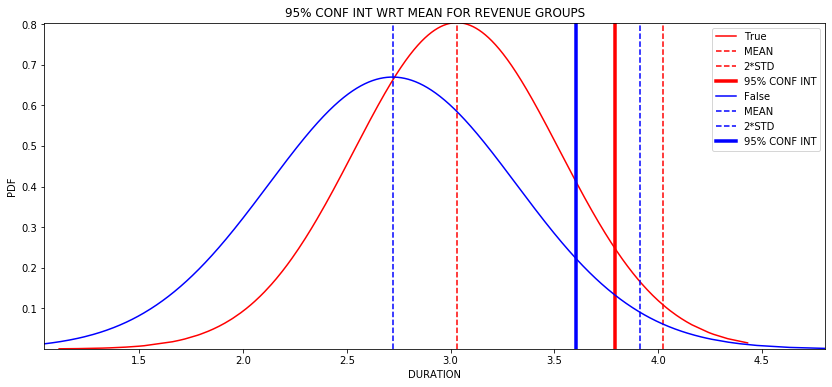

In [683]:
idx = 0
plt.figure(figsize=(14,6))
bolls = [True, False]
colr_data = ['red', 'blue']
for col in bolls:
    df1_1 = df[df['Revenue'] == col]
    df1_1 = df1_1[ df1_1['ProductRelated_Duration'] >10 ]
    datalog = np.sort(df1_1['ProductRelated_Duration'].apply(np.log10))
    datalog_pdf=scipy.stats.norm.pdf(datalog, loc=np.mean(datalog), scale=np.std(datalog) ) 
    datalog_cdf = scipy.stats.norm.cdf(datalog, loc=np.mean(datalog), scale=np.std(datalog) )
    plt.plot(datalog, datalog_pdf, color=colr_data[idx], label=col)
    plt.axvline(np.mean(datalog), linestyle='--', color=colr_data[idx], label='MEAN')
    plt.axvline(np.mean(datalog)+2*np.std(datalog), linestyle='--', color=colr_data[idx], label='2*STD')
    plt.axvline(np.percentile(datalog, [95]), linestyle='-', color=colr_data[idx], label='95% CONF INT', linewidth=3.5)
    plt.legend()
    plt.ylabel('PDF')
    plt.xlabel('DURATION')
    plt.title('95% CONF INT WRT MEAN FOR REVENUE GROUPS')
    plt.autoscale(tight=True, enable=True)
    idx += 1

In [684]:
df_RT = df[df['Revenue'] == True]
df_RF = df[df['Revenue'] == False]

df1 = df_RT[ df_RT['ProductRelated_Duration'] >10 ]
df2 = df_RF[ df_RF['ProductRelated_Duration'] >10 ]

ttest_ind(df1['ProductRelated_Duration'], df2['ProductRelated_Duration'], equal_var=False)

Ttest_indResult(statistic=12.952064466401076, pvalue=3.959749814353132e-37)

[]

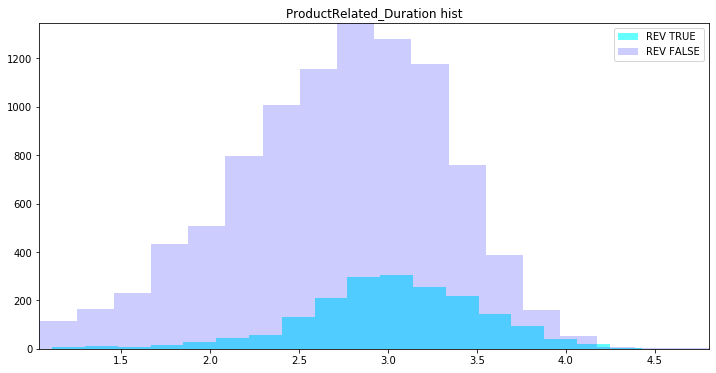

In [685]:
plt.figure(figsize=(12,6))
df1['ProductRelated_Duration'].apply(np.log10).hist(bins=18, alpha=0.6, color='cyan', label='REV TRUE')
df2['ProductRelated_Duration'].apply(np.log10).hist(bins=18, alpha=0.2, color='blue', label='REV FALSE')
plt.grid()
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('ProductRelated_Duration hist')
plt.plot()

## ML PREDICTIONS

In [686]:
df = df[df['Administrative_Duration'] > 0]
df = df[df['ProductRelated_Duration'] > 0]
df = df[df['Informational_Duration'] > 0]
print(len(df))
df['REV_B'] = df['Revenue'].apply(lambda x: 1 if x==True else 0)
df['WEEK_B'] = df['Weekend'].apply(lambda x: 1 if x==True else 0)
df.head()

1981


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,REV_B,WEEK_B
57,4.0,56.000000,2.0,120.0,36.0,998.741667,0.000000,0.014736,19.447079,0.2,Feb,2,2,4,1,Returning_Visitor,False,False,0,0
103,2.0,31.000000,1.0,16.0,36.0,2083.530952,0.000000,0.013510,0.000000,0.8,Feb,2,2,4,3,Returning_Visitor,False,False,0,0
109,6.0,326.250000,4.0,94.0,128.0,5062.213753,0.000855,0.017918,0.000000,0.0,Feb,2,5,1,3,Returning_Visitor,False,False,0,0
161,2.0,58.000000,2.0,22.0,31.0,829.166667,0.030303,0.040606,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,True,False,0,1
187,10.0,293.778205,2.0,153.0,96.0,3283.166739,0.001961,0.013509,0.000000,0.0,Mar,3,2,6,2,Returning_Visitor,True,False,0,1


In [687]:
# attr = ['Administrative', 'Administrative_Duration', 'Informational',
#        'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']

In [688]:
attr = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
        'BounceRates', 'ExitRates','PageValues', 'SpecialDay', 'WEEK_B',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']

In [689]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 57 to 12313
Data columns (total 20 columns):
Administrative             1981 non-null float64
Administrative_Duration    1981 non-null float64
Informational              1981 non-null float64
Informational_Duration     1981 non-null float64
ProductRelated             1981 non-null float64
ProductRelated_Duration    1981 non-null float64
BounceRates                1981 non-null float64
ExitRates                  1981 non-null float64
PageValues                 1981 non-null float64
SpecialDay                 1981 non-null float64
Month                      1981 non-null object
OperatingSystems           1981 non-null int64
Browser                    1981 non-null int64
Region                     1981 non-null int64
TrafficType                1981 non-null int64
VisitorType                1981 non-null object
Weekend                    1981 non-null bool
Revenue                    1981 non-null bool
REV_B                    

In [690]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'REV_B', 'WEEK_B'],
      dtype='object')

### RandomForestClassifier

In [691]:
test_sizee = np.arange(0.1, 0.4, 0.01)
depth = np.arange(2,8,1)
scores = []

for t_size in test_sizee:
    x_tr, x_t, y_tr, y_t = train_test_split(df[attr].values,(df['REV_B']).values, test_size=t_size)
    for d in depth:
        clf = RandomForestClassifier(max_depth=d)
        clf.fit(x_tr, y_tr)
        y_p = clf.predict(x_t)
        scores.append(accuracy_score(y_t, y_p))
        #scores.append(roc_auc_score(y_t, y_p))

maxx = 0
maxx_idx = 0
for idx in range(len(scores)):
    if scores[idx]>maxx:
        maxx = scores[idx]
        maxx_idx = idx
        

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

In [692]:
maxx

0.8542713567839196

### ExtraTreesClassifier

In [693]:
from sklearn import ensemble 
from sklearn.ensemble import ExtraTreesClassifier

In [694]:
test_sizee = np.arange(0.1, 0.4, 0.01)
depth = np.arange(2,8,1)
scores = []

for t_size in test_sizee:
    x_tr, x_t, y_tr, y_t = train_test_split(df[attr].values,(df['REV_B']).values, test_size=t_size)
    for d in depth:
        clf = ExtraTreesClassifier(max_depth=d)
        clf.fit(x_tr, y_tr)
        y_p = clf.predict(x_t)
        scores.append(accuracy_score(y_t, y_p))
        #scores.append(roc_auc_score(y_t, y_p))

maxx = 0
maxx_idx = 0
for idx in range(len(scores)):
    if scores[idx]>maxx:
        maxx = scores[idx]
        maxx_idx = idx
        

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

In [695]:
maxx

0.7969187675070029

### LogisticRegression

In [696]:
x_tr, x_t, y_tr, y_t = train_test_split(df[attr], df['REV_B'], test_size=0.24)
lr = LogisticRegression()
lr.fit(x_tr, y_tr)
y_h = lr.predict(x_t)
accuracy_score(y_t, y_h), roc_auc_score(y_t, y_h)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.7163865546218487, 0.5408163265306123)

In [697]:
test_sizee = np.arange(0.20, 0.4, 0.01)
scores = []
for t_size in test_sizee:
        x_tr, x_t, y_tr, y_t = train_test_split(df[attr].values,(df['REV_B']).values, test_size=t_size)
        lr = LogisticRegression()
        lr.fit(x_tr, y_tr)
        y_p = lr.predict(x_t)
        scores.append(accuracy_score(y_t, y_p))
        
def ret_max(scores):
    maxx = 0
    maxx_idx = 0
    for idx in range(len(scores)):
        if scores[idx]>maxx:
            maxx = scores[idx]
            maxx_idx = idx
    return [maxx, maxx_idx]

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [698]:
maxx

0.7969187675070029

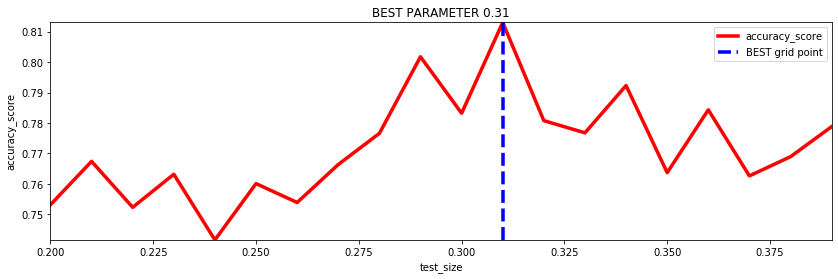

BEST PARAMETER 0.31
accuracy_score 0.81


In [699]:
plt.figure(figsize=(14,4))
plt.plot(test_sizee,scores, color='red', linewidth=3.5, label='accuracy_score')
plt.axvline(test_sizee[ret_max(scores)[1]], linestyle='--', color='blue', linewidth=3.5, label='BEST grid point')
plt.autoscale(tight=True, enable=True)
plt.legend()
plt.title('BEST PARAMETER %2.2f' %test_sizee[ret_max(scores)[1]])
plt.xlabel('test_size')
plt.ylabel('accuracy_score')
plt.show()
print('BEST PARAMETER %2.2f' %test_sizee[ret_max(scores)[1]])
print('accuracy_score %0.2f' %ret_max(scores)[0])

### ensemble.GradientBoostingClassifier 

In [700]:
x_tr, x_t, y_tr, y_t = train_test_split(df[attr].values,(df['REV_B']).values, test_size=0.30)
clf = ensemble.GradientBoostingClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
y_tr_p = clf.predict(x_tr)
print('Accuracy score over the test set %0.2f' %accuracy_score(y_t, y_p))
print('Accuracy score over the training set %0.2f' %accuracy_score(y_tr, y_tr_p))

Accuracy score over the test set 0.79
Accuracy score over the training set 0.90


In [701]:
test_sizee = np.arange(0.20, 0.4, 0.01)
scores = []
for t_size in test_sizee:
        x_tr, x_t, y_tr, y_t = train_test_split(df[attr].values,(df['REV_B']).values, test_size=t_size)
        lr = ensemble.GradientBoostingClassifier()
        lr.fit(x_tr, y_tr)
        y_p = lr.predict(x_t)
        scores.append(accuracy_score(y_t, y_p))
        
def ret_max(scores):
    maxx = 0
    maxx_idx = 0
    for idx in range(len(scores)):
        if scores[idx]>maxx:
            maxx = scores[idx]
            maxx_idx = idx
    return [maxx, maxx_idx]

In [702]:
maxx

0.7969187675070029

### GaussianNB

In [703]:
gnb = GaussianNB()
gnb.fit(x_tr, y_tr)
y_p = gnb.predict(x_t)
y_tr_p = gnb.predict(x_tr)
print('Accuracy score over the test set %0.2f' %accuracy_score(y_t, y_p))
print('Accuracy score over the training set %0.2f' %accuracy_score(y_tr, y_tr_p))

Accuracy score over the test set 0.76
Accuracy score over the training set 0.77


### DecisionTreeClassifier

In [704]:
dtc = DecisionTreeClassifier()
dtc.fit(x_tr, y_tr)
y_p = dtc.predict(x_t)
y_tr_p = dtc.predict(x_tr)
print('Accuracy score over the test set %0.2f' %accuracy_score(y_t, y_p))
print('roc_auc_score over the test set %0.2f' %roc_auc_score(y_t, y_p))


Accuracy score over the test set 0.68
roc_auc_score over the test set 0.59


## ML in Depth

In [705]:
MLclf = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), ExtraTreesClassifier(), RandomForestClassifier(), ensemble.GradientBoostingClassifier() ]
roc_list = []
accu_list = []
for clf in MLclf: 
    y_p = clf.fit(x_tr, y_tr).predict(x_t)
    roc_list.append(roc_auc_score(y_t, y_p))
    accu_list.append(accuracy_score(y_t, y_p))
    print(roc_auc_score(y_t, y_p))

0.5882930443641752
0.5900018523663981
0.6053996480503844
0.6001713438918218
0.6034731869963879


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6747013059183107


In [706]:
best_roc = 0
best_roc_idx = 0

for idx in range(len(roc_list)):
    if (roc_list[idx]>best_roc):
        best_roc = roc_list[idx]
        best_roc_idx = idx
        
print('The best classifier from default parameter :', MLclf[best_roc_idx], '\n', 'with roc_auc_score : ', best_roc)

The best classifier from default parameter : GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False) 
 with roc_auc_score :  0.6747013059183107


In [707]:
best_acu = 0
best_acu_idx = 0

for idx in range(len(accu_list)):
    if (accu_list[idx]>best_roc):
        best_acu = accu_list[idx]
        best_acu_idx = idx
        
print('The best classifier from default parameter :', MLclf[best_acu_idx], '\n', 'with accuracy_score : ', best_acu)

The best classifier from default parameter : GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False) 
 with accuracy_score :  0.796895213454075
